# Memoria

In [1]:
import matplotlib.pyplot as plt
import os

clases = {'a':0, 'e':0, 'i':0, 'o':0, 'u':0, 'A':0, 'E':0, 'I':0, 'O':0, 'U':0}

dirname = "out/"

## Datos

En este apartado analizaremos los datos, las clases.

In [2]:
images = []

for filename in os.listdir(dirname):

    images.append( plt.imread(dirname + filename) )
    
    clases[filename[-5]] += 1

En la siguiente imagen se observan imágenes de ejemplo de cada clase.

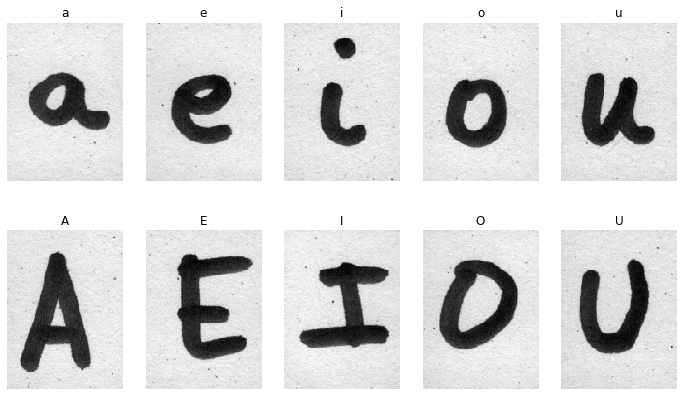

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 7))

for i, cls in enumerate(clases.keys()):

    image = plt.imread(dirname + '0000' + str(i) + '_' + cls + '.png')
    
    if i >= 5:
        x = 1
        y = i - 5

    else:
        x = 0
        y = i

        
    ax[x, y].imshow(image, cmap="gray")
    ax[x, y].axis('off')
    ax[x, y].set_title (cls)


plt.show()

Observamos que el número de ejemplos para cada clase es el mismo, en concreto de *110*.

In [4]:
m = '''
                  -------------------------------------------------------------
                  |  a  |  e  |  i  |  o  |  u  |  A  |  E  |  I  |  O  |  U  |
-------------------------------------------------------------------------------
| Número de datos | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} | {:3d} |
-------------------------------------------------------------------------------
'''

print(m.format(clases['a'], clases['e'], clases['i'], clases['o'], clases['u'],
               clases['A'], clases['E'], clases['I'], clases['O'], clases['U']))


                  -------------------------------------------------------------
                  |  a  |  e  |  i  |  o  |  u  |  A  |  E  |  I  |  O  |  U  |
-------------------------------------------------------------------------------
| Número de datos | 110 | 110 | 110 | 110 | 110 | 110 | 110 | 110 | 110 | 110 |
-------------------------------------------------------------------------------



## Análisis y modificación de datos

Analizaremos las modificaciones que se pueden realizar a cada dato.

In [5]:
from utils import delete_background, center_image

### Eliminación del fondo

Se elimna el fondo poniendo la imagen en colores binarios y dando la vuelta a estos. (Los blancos pasan a ser negros y viceversa). También se hace uso de la técnica de *apertura* en tratamiento de imágenes, para eliminar pequeñas manchas o imperfecciones en la transformación a colores binarios.

```
def delete_background(img):

    tranf = img.copy()

    tranf[(img > 0.6)] = 0
    tranf[(img <= 0.6)] = 1

    tranf = morphology.binary_opening(tranf)

    return tranf
```

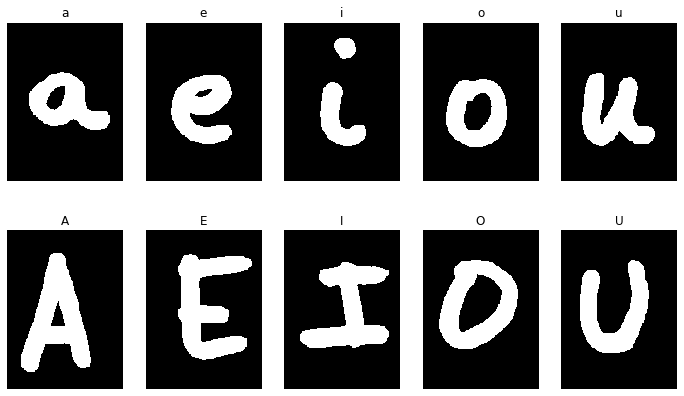

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 7))

for i, cls in enumerate(clases.keys()):

    image = plt.imread(dirname + '0000' + str(i) + '_' + cls + '.png')
    image = delete_background(image)
    
    if i >= 5:
        x = 1
        y = i - 5

    else:
        x = 0
        y = i

        
    ax[x, y].imshow(image, cmap="gray")
    ax[x, y].axis('off')
    ax[x, y].set_title (cls)


plt.show()

### Eliminación del fondo

Se centran las imágenes buscando los puntos blancos mas cercanos a los bordes. Para ello, primero es necesario aplicar la técnica para eliminar el fondo.

```
def center_image(img):

    height = img.shape[-2]
    width = img.shape[-1]

    col_sum = np.where( np.sum(img, axis=0) > 0 )
    row_sum = np.where( np.sum(img, axis=1) > 0 )

    y1, y2 = row_sum[0][0], row_sum[0][-1]
    x1, x2 = col_sum[0][0], col_sum[0][-1]

    cropped_image = img[y1:y2, x1:x2]

    move_y = int(((y1 + height - y2) / 2) - y1)
    move_x = int(((x1 + width - x2) / 2) - x1)

    tf_form = tf.AffineTransform(translation=(-move_x, -move_y))

    return tf.warp(img, tf_form)
```

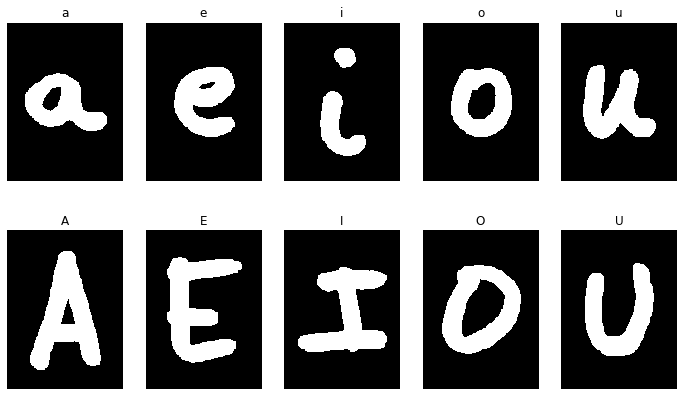

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 7))

for i, cls in enumerate(clases.keys()):

    image = plt.imread(dirname + '0000' + str(i) + '_' + cls + '.png')
    image = delete_background(image)
    image = center_image(image)
    
    if i >= 5:
        x = 1
        y = i - 5

    else:
        x = 0
        y = i

        
    ax[x, y].imshow(image, cmap="gray")
    ax[x, y].axis('off')
    ax[x, y].set_title (cls)


plt.show()

Como en las imágenes de ejemplo no se observa correctamente la aportación de esta función usaremos otros datos de mayor interés.

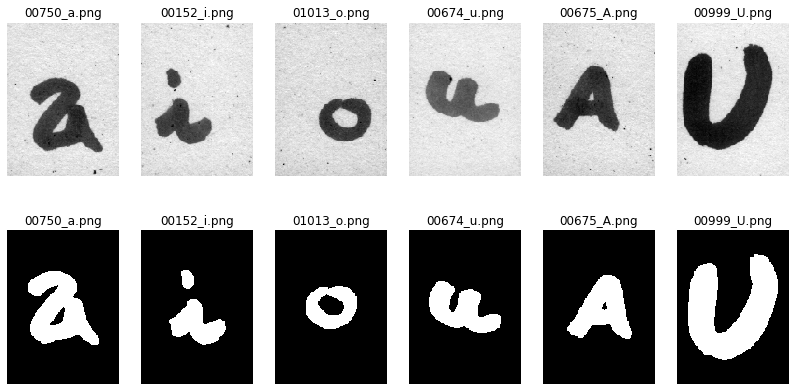

In [8]:
images = ['00750_a.png', '00152_i.png', '01013_o.png', '00674_u.png', '00675_A.png', '00999_U.png']

fig, ax = plt.subplots(nrows=2, ncols=len(images), figsize=(14, 7))

for i, img in enumerate(images):
    
    image = plt.imread(dirname + img)
    image_t = delete_background(image)
    image_t = center_image(image_t)

        
    ax[0, i].imshow(image, cmap="gray")
    ax[0, i].axis('off')
    ax[0, i].set_title (img)
    
    ax[1, i].imshow(image_t, cmap="gray")
    ax[1, i].axis('off')
    ax[1, i].set_title (img)


plt.show()

### Inconvenientes

Nos podemos encontrar con algunos inconvenientes, que dificulten la detección. A continuación, se ponen algunos ejemplos.

En ellos se unen parte de las letras, lo cual hace dudar al modelo.

Incluso, nos podemos encontrar otras imágenes en el dataset, que debido a incovenientes en las escala, por ejemplo, producen errores en la detección. (Ejemplo propuesto con las imágenes con las clases *u* y *U*).

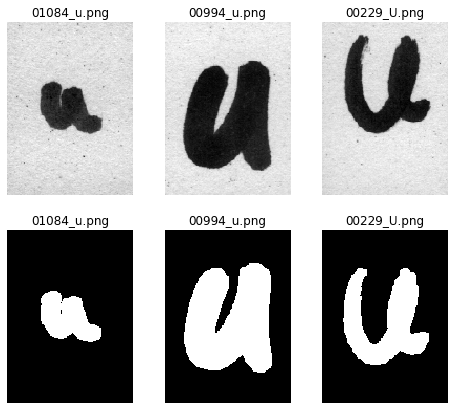

In [9]:
images = ['01084_u.png', '00994_u.png', '00229_U.png']

fig, ax = plt.subplots(nrows=2, ncols=len(images), figsize=(8, 7))

for i, img in enumerate(images):
    
    image = plt.imread(dirname + img)
    image_t = delete_background(image)
    image_t = center_image(image_t)

        
    ax[0, i].imshow(image, cmap="gray")
    ax[0, i].axis('off')
    ax[0, i].set_title (img)
    
    ax[1, i].imshow(image_t, cmap="gray")
    ax[1, i].axis('off')
    ax[1, i].set_title (img)


plt.show()

## Data Augmentation